In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import requests

raw_url = "https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt"

response = requests.get(raw_url)
with open("names.txt", "w") as f:
    f.write(response.text)

In [ ]:
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
import string

chars = sorted(list(string.ascii_lowercase))
chars.append('.')
print(chars)
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
itos[0] = '.'
print(itos)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '.']
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
block_size = 3
X, Y = [], []

for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
    # print()

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []

    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]
        # print()

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
C = torch.randn((27, 2))

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.6861,  0.1964])

In [ ]:
C[X].shape

torch.Size([228146, 3, 2])

In [ ]:
X[13, 2]

tensor(1)

In [ ]:
C[X][13, 2]

tensor([-0.0552, -0.1074])

In [ ]:
C[1]

tensor([-0.0552, -0.1074])

In [ ]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
emb[0]

tensor([[0.6149, 0.0320],
        [0.6149, 0.0320],
        [0.6149, 0.0320]])

In [ ]:
torch.cat(torch.unbind(emb, 1), 1)

tensor([[ 0.6149,  0.0320,  0.6149,  0.0320,  0.6149,  0.0320],
        [ 0.6149,  0.0320,  0.6149,  0.0320, -0.6861,  0.1964],
        [ 0.6149,  0.0320, -0.6861,  0.1964, -0.0077,  0.7471],
        ...,
        [ 1.5759,  0.4329,  1.5759,  0.4329,  0.7851,  0.9874],
        [ 1.5759,  0.4329,  0.7851,  0.9874,  1.5759,  0.4329],
        [ 0.7851,  0.9874,  1.5759,  0.4329, -0.4316, -2.2908]])

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
# tensor.view doesn't create new memory, thus faster.

In [ ]:
h

tensor([[-0.6167,  0.4619, -0.6798,  ..., -0.7786, -0.2232, -0.9476],
        [ 0.1218,  0.6885,  0.5895,  ..., -0.9037,  0.3584, -0.9818],
        [ 0.1420,  0.9115, -0.6184,  ...,  0.2277, -0.5465, -0.9989],
        ...,
        [-0.0735,  0.9313,  0.9453,  ...,  0.5601, -0.8380, -0.9991],
        [-0.8531,  0.8205, -0.3929,  ...,  0.1085, -0.9970, -0.9990],
        [-0.9930, -0.9918,  0.3465,  ..., -0.9999, -0.9878, -0.3669]])

In [ ]:
h.shape

torch.Size([228146, 100])

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([228146, 27])

In [ ]:
counts = logits.exp()

In [ ]:
probs = counts / counts.sum(dim=1, keepdims=True)

In [ ]:
probs.shape

torch.Size([228146, 27])

In [ ]:
probs[0]

tensor([6.9126e-12, 2.0499e-03, 2.3543e-10, 5.6937e-12, 1.9763e-04, 1.7398e-06,
        8.3956e-04, 6.4487e-05, 8.5743e-07, 1.6622e-05, 1.9794e-04, 1.4029e-02,
        9.5292e-10, 2.0824e-07, 8.9423e-09, 1.3472e-07, 7.5672e-09, 5.1433e-07,
        1.3610e-03, 7.2608e-06, 1.0970e-03, 1.1005e-04, 1.9634e-04, 2.4898e-04,
        6.8314e-01, 2.9624e-01, 2.0761e-04])

### actual code

In [ ]:
MANUAL_SEED = 2147483647

In [433]:
g = torch.Generator().manual_seed(MANUAL_SEED)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [434]:
sum(p.nelement() for p in parameters)

11897

In [435]:
for p in parameters:
    p.requires_grad = True

In [436]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [437]:
lossi = []
stepi = []

In [438]:
# training
for i in range(200000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # fwd pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())

    # back pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

# print(loss.item())

In [439]:
print(loss.item())

2.001555919647217


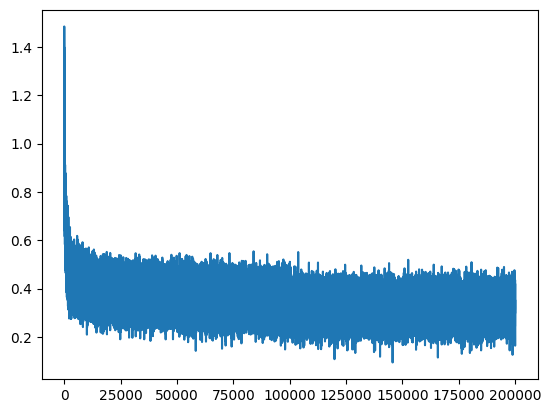

In [440]:
plt.plot(stepi, lossi)

In [441]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1738, grad_fn=<NllLossBackward0>)

In [442]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1309, grad_fn=<NllLossBackward0>)

In [443]:
emb.shape

torch.Size([182625, 3, 10])

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)

for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [449]:
def generate_sample():
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    return ''.join(itos[i] for i in out)

In [452]:
g = torch.Generator().manual_seed(MANUAL_SEED + 10)

for _ in range(20):
    print(generate_sample())

mora.
mayah.
seel.
nihayla.
rethan.
ejdrae.
caderedielin.
shi.
jen.
eden.
estanar.
elle.
malaia.
noshubergiairiel.
kendreelle.
jete.
con.
brence.
ryyah.
faeh.
